# Simple Machine Learining Models

Input: single principal component based on all 15 indicators + monthly returns

Output: optimal max-shape portfolio with tight restrictions for the next period

In [1]:
import numpy as np

import os
os.chdir(os.path.expanduser('../'))

from helper_functions import run_full_backtesting

In [2]:
os.chdir(os.path.expanduser('../data'))

from dotenv import load_dotenv
load_dotenv()

from DataProvider import DataProvider

In [3]:
data_provider = DataProvider()
x = data_provider.get_formatted_features(flatten=True)
y = data_provider.get_formatted_targets()
x_train, y_train, _, _, x_test, y_test = data_provider.train_train_split(x, y, with_val=False)

## Random Forest

In [4]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
regressor_random_forest = RandomForestRegressor()
regressor_random_forest.fit(x_train, y_train)

RandomForestRegressor()

Checking example predictions

In [32]:
predictions = regressor_random_forest.predict(x_test)

In [33]:
predictions[0].round(3)

array([0.503, 0.059, 0.065, 0.034, 0.028, 0.029, 0.028, 0.025, 0.01 ,
       0.01 , 0.015, 0.013, 0.012, 0.012, 0.013, 0.009, 0.01 , 0.007,
       0.032, 0.013, 0.013, 0.014, 0.012, 0.008, 0.009, 0.007, 0.007])

In [34]:
y_test[0]

array([0.576, 0.046, 0.075, 0.023, 0.02 , 0.039, 0.017, 0.016, 0.007,
       0.008, 0.02 , 0.005, 0.02 , 0.02 , 0.004, 0.002, 0.002, 0.002,
       0.024, 0.025, 0.02 , 0.012, 0.006, 0.003, 0.004, 0.002, 0.002])

Checking portfolios to match 1.0

In [35]:
preditions_sum = predictions.sum(axis=1)
preditions_sum

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])

In [36]:
preditions_sum = preditions_sum.reshape(predictions.shape[0], 1)
predictions = np.divide(predictions, preditions_sum)

In [37]:
predictions.sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])

## Gradient Boosting

In [38]:
import xgboost as xgb

In [39]:
regressor_xg_boosting = xgb.XGBRegressor()
regressor_xg_boosting.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [40]:
xg_boost_predictions = regressor_xg_boosting.predict(x_test)
xg_boost_predictions.sum(axis=1)

array([1.0386713 , 0.9127877 , 0.98712736, 0.93805903, 0.9715003 ,
       0.9579683 , 0.98654526, 1.0001103 , 0.97640914, 0.98914385,
       0.9715226 , 1.0645275 , 1.0740459 , 0.924877  , 1.0752624 ,
       1.0624228 , 1.1007788 , 1.068862  , 0.9394597 , 1.0435455 ,
       1.0913327 , 1.0853958 , 1.0787748 , 1.0794476 , 1.0816396 ,
       1.1490664 , 1.1487061 , 1.160451  , 0.9905784 , 1.0800381 ,
       1.0166037 , 1.0988826 , 1.0950974 , 1.1086546 , 1.0164729 ,
       0.9959516 , 0.9712758 , 1.010017  , 1.0294124 , 1.025758  ,
       0.91728705, 1.0369508 , 0.9855081 , 0.9918301 , 0.9677103 ,
       0.9969422 , 0.8940262 , 0.9529381 , 0.99799496, 0.9662839 ,
       0.9944415 , 0.96561396, 1.1082631 , 1.0793494 , 1.1044397 ,
       1.0785359 , 1.042121  , 0.96490526], dtype=float32)

In [41]:
xg_boost_preditions_sum = xg_boost_predictions.sum(axis=1).reshape(xg_boost_predictions.shape[0], 1)
xg_boost_predictions = np.divide(xg_boost_predictions, xg_boost_preditions_sum)

In [42]:
xg_boost_predictions.sum(axis=1).round(3)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.], dtype=float32)

## Backtesting

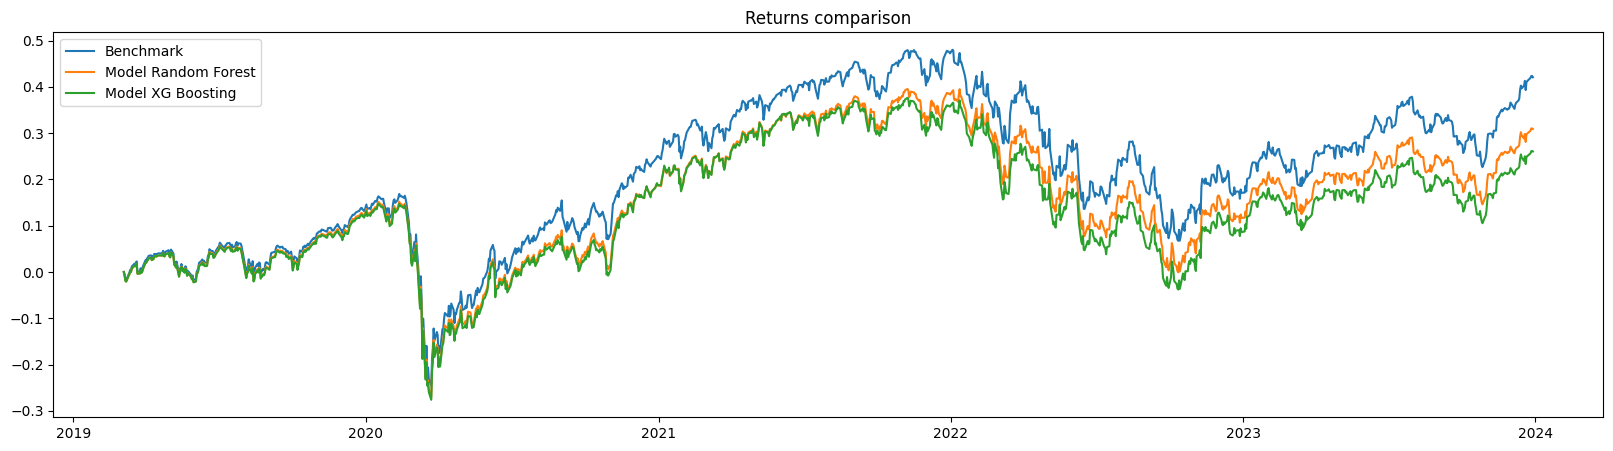

,Annual Returns,Annual Volatility,Sharpe Ratio,Sortino Ratio,Max Drawdown,Max Time Under Water,Calmar Ratio,Information Ratio
Benchmark,0.0768,0.2033,0.3775,0.4420,-0.3548,500.0,0.2163,0.0000
Model Random Forest,0.0581,0.2021,0.2875,0.3338,-0.3669,538.0,0.1584,-0.6980
Model XG Boosting,0.0498,0.2031,0.2454,0.2844,-0.3693,538.0,0.1350,-0.7803


In [43]:
models = {
    'Model Random Forest': (regressor_random_forest, x_test),
    'Model XG Boosting': (regressor_xg_boosting, x_test)
}

df_results = run_full_backtesting(data_provider, models)
df_results